In [1]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

In [215]:
df = pd.read_csv('./14_06_2019_09_08/full_results.csv')

In [216]:
print('Name: precision, recall, fscore')
print('P_bin:', precision_recall_fscore_support(df['P_bin'], df['P_bin_pred'], average='micro')[:3])
print('R_bin:', precision_recall_fscore_support(df['R_bin'], df['R_bin_pred'], average='micro')[:3])
print('Res_bin:', precision_recall_fscore_support(df['Res_bin'], df['Res_bin_pred'], average='micro')[:3])
print('Cal_bin:', precision_recall_fscore_support(df['Cal_bin'], df['Cal_bin_pred'], average='micro')[:3])

Name: precision, recall, fscore
P_bin: (0.7047619047619048, 0.7047619047619048, 0.7047619047619048)
R_bin: (0.7714285714285715, 0.7714285714285715, 0.7714285714285715)
Res_bin: (0.47619047619047616, 0.47619047619047616, 0.47619047619047616)
Cal_bin: (0.580952380952381, 0.580952380952381, 0.580952380952381)


In [217]:
multi = np.array(list(zip(df['P_bin'], df['R_bin'], df['Res_bin'], df['Cal_bin'])))
multi_pred = np.array(list(zip(df['P_bin_pred'], df['R_bin_pred'], df['Res_bin_pred'], df['Cal_bin_pred'])))

In [220]:
precision_recall_fscore_support(multi, multi_pred, average='micro')[:3]

(0.5728155339805825, 0.6413043478260869, 0.6051282051282051)

In [218]:
print('Accuracy:')
print('P_bin:', accuracy_score(df['P_bin'], df['P_bin_pred']))
print('R_bin:', accuracy_score(df['R_bin'], df['R_bin_pred']))
print('Res_bin:', accuracy_score(df['Res_bin'], df['Res_bin_pred']))
print('Cal_bin:', accuracy_score(df['Cal_bin'], df['Cal_bin_pred']))
print('MultiLabel:', accuracy_score(multi, multi_pred))

Accuracy:
P_bin: 0.7047619047619048
R_bin: 0.7714285714285715
Res_bin: 0.47619047619047616
Cal_bin: 0.580952380952381
MultiLabel: 0.2


In [2]:
quality = pd.read_csv('./quality_all_subs.csv')

In [3]:
trans = {'P_bin': "(1,0,0,0)", 
         'R_bin': "(1,0,0,0)", 
         'Res_bin': "(1,0,0,0)", 
         'Cal_bin': "(1,0,0,0)", 
        "('P_bin', 'R_bin')": "(1,1,0,0)", 
         "('P_bin', 'Res_bin')": "(1,0,1,0)", 
         "('P_bin', 'Cal_bin')": "(1,0,0,1)", 
         "('R_bin', 'Res_bin')": "(0,1,1,0)", 
         "('R_bin', 'Cal_bin')": "(0,1,0,1)", 
         "('Res_bin', 'Cal_bin')": "(0,0,1,1)", 
         "('P_bin', 'R_bin', 'Res_bin')": "(1,1,1,0)", 
         "('P_bin', 'R_bin', 'Cal_bin')": "(1,1,0,1)", 
         "('P_bin', 'Res_bin', 'Cal_bin')": "(1,0,1,1)", 
         "('R_bin', 'Res_bin', 'Cal_bin')": "(0,1,1,1)", 
         "('P_bin', 'R_bin', 'Res_bin', 'Cal_bin')": "(1,1,1,1)" 
}


In [4]:
quality.columns = [trans.get(item,item) for item in list(quality.columns)]

In [5]:
quality['orig_matcher'], quality['sub_matcher'], quality['seq'] = quality['matcher'].str.split('_', expand=True).T.values 
quality['orig_matcher'] = quality['orig_matcher'].str.lstrip('0')
quality[(quality['sub_matcher'].isna())]['sub_matcher'] = '000'

C:\Users\shrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# quality = quality[~quality['matcher'].str.contains('_')].drop(['P','R','Res','Cal'], axis = 1)
# quality = quality.drop(['matcher', 'P','R','Res','Cal'], axis = 1)

In [7]:
quality_no_subs = quality[~quality['matcher'].str.contains('_')].drop(['P','R','Res','Cal','orig_matcher', 'sub_matcher', 'seq'], 
                                                                      axis = 1)
sums = [len(quality_no_subs),] + list(quality_no_subs.sum())[1:]
names = ['Total',] + list(quality_no_subs.columns)[1:]
cords = list(range(len(quality_no_subs.sum())))

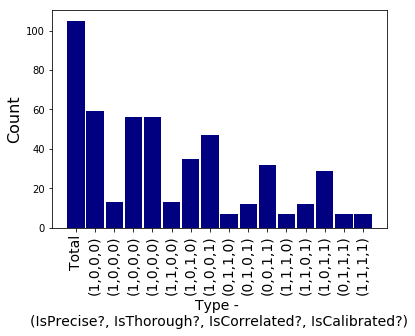

In [8]:
plt.clf()
width= 0.9
p1 = plt.bar(cords, sums, align = 'center', color = 'navy', label="Expert Types", width= width)
plt.xticks(cords, names, fontsize=14, rotation=90)
# plt.yticks(,fontsize=14)
plt.ylabel("Count", fontsize=16)
plt.xlabel("Type - \n(IsPrecise?, IsThorough?, IsCorrelated?, IsCalibrated?)", fontsize=14)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, fancybox=True)
# plt.savefig('control_p6.eps', bbox_inches = 'tight', format='eps')
# plt.text(s = '(IsPrecise?, IsThorough?, IsCorrelated?, IsCalibrated?)', x = 3, y = 80, fontsize=12)
plt.savefig('expert_types_no_subs.jpg', bbox_inches = 'tight', format='jpg')
plt.show()

# COMPLETE!

In [9]:
# quality_with_subs = quality.drop(['P','R','Res','Cal','orig_matcher', 'sub_matcher', 'seq'], axis = 1)
# sums = [len(quality),] + list(quality.sum())[1:]
# names = ['Total',] + list(quality.columns)[1:]
# cords = list(range(len(quality.sum())))

In [10]:
# quality_with_subs.sum()

In [11]:
# plt.clf()
# width= 0.9
# p1 = plt.bar(cords, sums, align = 'center', color = 'navy', label="Expert Types", width= width)
# plt.xticks(cords, names, fontsize=14, rotation=90)
# # plt.yticks(,fontsize=14)
# plt.ylabel("Count", fontsize=16)
# plt.xlabel("Type", fontsize=16)
# # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, fancybox=True)
# # plt.savefig('control_p6.eps', bbox_inches = 'tight', format='eps')
# plt.savefig('expert_types_with_subs.jpg', bbox_inches = 'tight', format='jpg')
# plt.show()

In [12]:
quality_seqs_full = quality[(quality['seq'].isna()) | quality['seq'].str.contains('0000')]
loc = './figs/'

In [15]:
for orig in quality_seqs_full['orig_matcher'].unique():
    max_sub = quality_seqs_full[quality_seqs_full['orig_matcher'] == orig]['sub_matcher'].str.lstrip('0').astype(float).max()
    if np.isnan(max_sub):
        max_sub = 5
    quality_seqs_full.loc[quality_seqs_full['matcher'] == orig, 'sub_matcher'] = int(max_sub)

C:\Users\shrag\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2
3
4
5
6
7
11
13
14
15
16
17
21
22
23
24
25
26
27
31
32
33
34
35
36
37
41
42
43
44
45
46
47
51
52
53
54
55
56
57
61
62
63
64
65
66
67
71
72
73
74
75
76
77
81
82
83
84
85
86
87
91
92
93
94
95
96
97
103
104
105
106
111
112
113
114
115
116
117
122
123
124
125
132
133
134
135
136
137
138
142
143
144
145
146
147
151
152
153
155
156
161
162
164
171


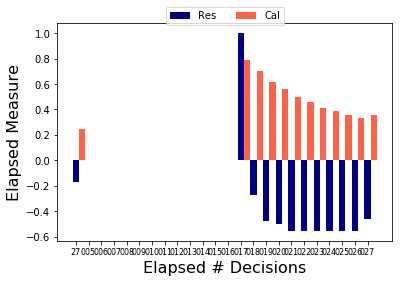

In [16]:
for orig in quality_seqs_full['orig_matcher'].unique():
    print(orig)
    quality_seqs = quality_seqs_full[quality_seqs_full['orig_matcher'] == orig]
    Ps = quality_seqs['P']
    Rs = quality_seqs['R']
    names = list(quality_seqs['sub_matcher'])
    cords = list(range(len(quality_seqs)))
    plt.clf()
    width= 0.5
    p1 = plt.bar(cords, Ps, align = 'center', color = 'navy', label="P", width= width)
    p2 = plt.bar([c+width for c in cords], Rs, align = 'center', color = 'tomato', label="R", width= width)
    plt.xticks(cords, names, fontsize=8)
    plt.yticks(np.linspace(0.0, 1.0, num=6),fontsize=14)
    plt.ylabel("Elapsed Measure", fontsize=16)
    plt.xlabel("Elapsed # Decisions", fontsize=16)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, fancybox=True)
    plt.axhline(y=0.5)
    # plt.savefig('control_p6.eps', bbox_inches = 'tight', format='eps')
    plt.savefig(loc + orig + '_P_R_over_time.jpg', bbox_inches = 'tight', format='jpg')
    Ress = quality_seqs['Res']
    Cals = quality_seqs['Cal']
    plt.clf()
    width= 0.5
    p1 = plt.bar(cords, Ress, align = 'center', color = 'navy', label="Res", width= width)
    p2 = plt.bar([c+width for c in cords], Cals, align = 'center', color = 'tomato', label="Cal", width= width)
    plt.xticks(cords, names, fontsize=8)
    plt.ylabel("Elapsed Measure", fontsize=16)
    plt.xlabel("Elapsed # Decisions", fontsize=16)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, fancybox=True)
    plt.savefig(loc + orig + '_Res_Cal_over_time.jpg', bbox_inches = 'tight', format='jpg')

In [17]:
quality_seqs_full['sub_matcher'] = quality_seqs_full['sub_matcher'].astype(int)
Ps = quality_seqs_full.groupby('sub_matcher')['P'].mean().values.tolist()
Rs = quality_seqs_full.groupby('sub_matcher')['R'].mean().values.tolist()
names = [s[0] for s in list(quality_seqs_full.groupby('sub_matcher')['sub_matcher'])]
cords = list(range(len(names)))

C:\Users\shrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
quality_seqs_full['sub_matcher_bins'] = pd.qcut(quality_seqs_full['sub_matcher'], 10)

C:\Users\shrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
# quality_seqs_full['sub_matcher_bins'] = quality_seqs_full['sub_matcher_bins'].astype(int)
Ps = quality_seqs_full.groupby('sub_matcher_bins')['P'].mean().values.tolist()
Rs = quality_seqs_full.groupby('sub_matcher_bins')['R'].mean().values.tolist()
names = [(math.ceil(s[0].left), math.ceil(s[0].right)) for s in list(quality_seqs_full.groupby('sub_matcher_bins')['sub_matcher_bins'])]
cords = list(range(len(names)))

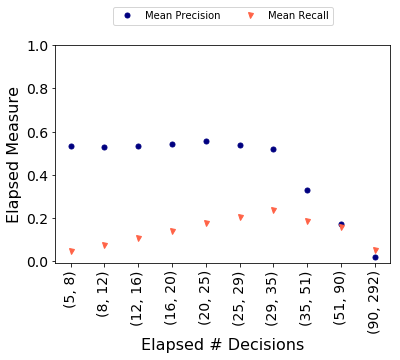

In [20]:
# plt.clf()
# width= 0.5
# p1 = plt.bar(cords, Ps, align = 'center', color = 'navy', label="P", width= width)
# p2 = plt.bar([c+width for c in cords], Rs, align = 'center', color = 'tomato', label="R", width= width)
# plt.xticks(cords, names, fontsize=8)
# # plt.yticks(,fontsize=14)
# plt.ylabel("Eval", fontsize=16)
# plt.xlabel("Type", fontsize=16)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, fancybox=True)
# # plt.savefig('control_p6.eps', bbox_inches = 'tight', format='eps')
# plt.savefig('P_R_over_time.jpg', bbox_inches = 'tight', format='jpg')
# plt.show()

plt.clf()
width = 0.5

plt.plot(cords, Ps, color = 'navy',
          label="Mean Precision", markersize=5, marker='o', linewidth=0)
plt.plot(cords, Rs, color = 'tomato',
          label="Mean Recall", markersize=5, marker='v', linewidth=0)

# y = np.array(pd.to_numeric(quality_seqs_full['P']))
# x = np.array(pd.to_numeric(quality_seqs_full['sub_matcher']))
# slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x,y)
# Trend_Correct = intercept1 + slope1*x
# p4 = plt.plot(x, Trend_Correct, linestyle='-', color = 'navy',
#               label='Trend Precision', markersize=0)

# y = np.array(pd.to_numeric(quality_seqs_full['R']))
# x = np.array(pd.to_numeric(quality_seqs_full['sub_matcher']))
# slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x,y)
# Trend_Correct = intercept2 + slope2*x
# p6 = plt.plot(x, Trend_Correct, linestyle='-', color = 'tomato',
#               label='Trend Recall', markersize=0)

plt.xticks(cords, names, fontsize=14, rotation=90)
plt.yticks(np.linspace(0.0, 1.0, num=6),fontsize=14)
plt.ylabel("Elapsed Measure", fontsize=16)
plt.xlabel("Elapsed # Decisions", fontsize=16)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, fancybox=True)
plt.savefig('P_R_over_time.jpg', bbox_inches = 'tight', format='jpg')
plt.show()

In [21]:
# quality_seqs_full['sub_matcher_bins'] = quality_seqs_full['sub_matcher_bins'].astype(int)
Ress = quality_seqs_full.groupby('sub_matcher_bins')['Res'].mean().values.tolist()
Cals = quality_seqs_full.groupby('sub_matcher_bins')['Cal'].mean().values.tolist()
# names = [(math.ceil(s[0].left), math.ceil(s[0].right)) for s in list(quality_seqs_full.groupby('sub_matcher_bins')['sub_matcher_bins'])]
# cords = list(range(len(names))

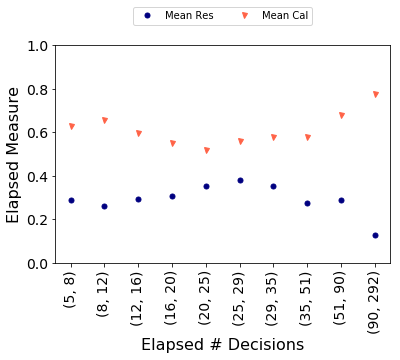

In [22]:
plt.clf()
width = 0.5

plt.plot(cords, Ress, color = 'navy',
          label="Mean Res", markersize=5, marker='o', linewidth=0)
plt.plot(cords, Cals, color = 'tomato',
          label="Mean Cal", markersize=5, marker='v', linewidth=0)

plt.xticks(cords, names, fontsize=14, rotation=90)
plt.yticks(np.linspace(0.0, 1.0, num=6),fontsize=14)
plt.ylabel("Elapsed Measure", fontsize=16)
plt.xlabel("Elapsed # Decisions", fontsize=16)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, fancybox=True)
plt.savefig('Res_Cal_over_time.jpg', bbox_inches = 'tight', format='jpg')
plt.show()